In [1]:
import geopandas as gpd
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
subs_wlatlon = pd.read_csv("Data\\SUB_EGAT.csv")
subs_wlatlon.reset_index(inplace=True,drop=True)
subs_wlatlon = gpd.GeoDataFrame(subs_wlatlon, geometry =gpd.points_from_xy(subs_wlatlon['LONG,N,19,11'],subs_wlatlon['LAT,N,19,11']))
subs_wlatlon = subs_wlatlon.loc[subs_wlatlon['STATUS,C,50'] == 'EXISTING']
subs_wlatlon.reset_index(inplace=True,drop=True)
subs_wlatlon.crs = {'init': 'epsg:4326'}
subs_wlatlon['buffer'] = subs_wlatlon['geometry'].buffer(0.5)
print(subs_wlatlon.loc[subs_wlatlon['STATIONID,C,4'] == 'LE']) 

d:\workstation\REPowerPlant_Siting\env\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\595078\AppData\Local\Temp\ipykernel_20040\3380514026.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  subs_wlatlon['buffer'] = subs_wlatlon['geometry'].buffer(0.5)


   STATIONID,C,4 NAME_E,C,100 SUBNAME_T,C,100  \
86            LE         LOEI          สฟ.เลย   

                                       LOCATION,C,254  LAT,N,19,11  \
86  125 หมู่ 8 ต.นาโป่ง อเมือง จ.เลยท  ตู้ ปณ. 30 ...    17.403207   

    LONG,N,19,11 STATUS,C,50  VOLTAGE500,C,5  VOLTAGE230,C,5  VOLTAGE115,C,5  \
86    101.734252    EXISTING             NaN             NaN           115.0   

    VOLTAGE69,C,5  VOLTAGE132,C,5 Other,C,254  Unnamed: 13  \
86            NaN             NaN    SUB_EGAT          NaN   

                      geometry  \
86  POINT (101.73425 17.40321)   

                                               buffer  
86  POLYGON ((102.23425 17.40321, 102.23184 17.354...  


<Axes: >

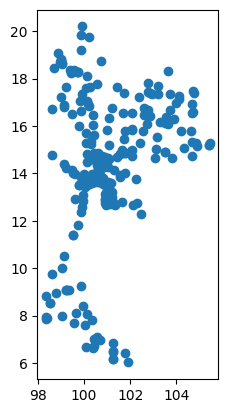

In [6]:
subs_wlatlon['geometry'].plot()

In [3]:
SI_file_list = [
    'Output\\xr_SI_Landcover.nc',
    'Output\\xr_SI_Slope.nc',
    'Output\\xr_SI_Elevation.nc',
    'Output\\xr_SI_Distancetosettlementarea.nc',
    'Output\\xr_SI_Distancetowetland.nc',
    'Output\\xr_SI_Distancetoforest.nc',
    'Output\\xr_SI_Distancetoroad.nc',
    'Output\\xr_SI_Distancetosubstation.nc',
    'Output\\xr_SI_resourcepotential.nc'
]

In [4]:
sub_name = 'LE'
type = 'SI_Wind' 

C:\Users\595078\AppData\Local\Temp\ipykernel_20040\3783726891.py:2: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  min_lon = subs_wlatlon['buffer'].loc[subs_wlatlon['STATIONID,C,4'] == sub_name].unary_union.bounds[0]
C:\Users\595078\AppData\Local\Temp\ipykernel_20040\3783726891.py:3: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  max_lon = subs_wlatlon['buffer'].loc[subs_wlatlon['STATIONID,C,4'] == sub_name].unary_union.bounds[2]
C:\Users\595078\AppData\Local\Temp\ipykernel_20040\3783726891.py:4: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  max_lat = subs_wlatlon['buffer'].loc[subs_wlatlon['STATIONID,C,4'] == sub_name].unary_union.bounds[1]
C:\Users\595078\AppData\Local\Temp\ipykernel_20040\3783726891.py:5: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  min_lat = 

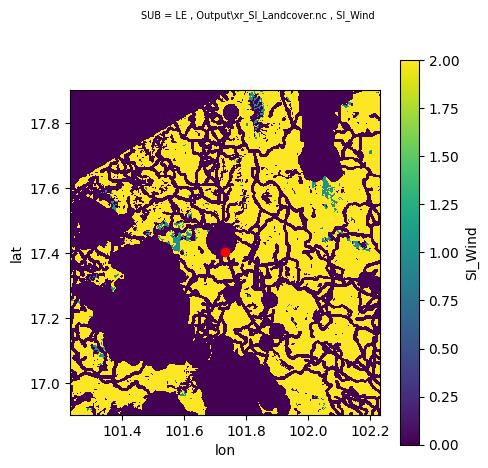

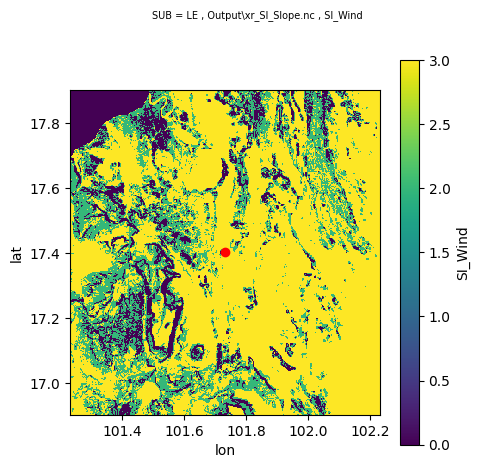

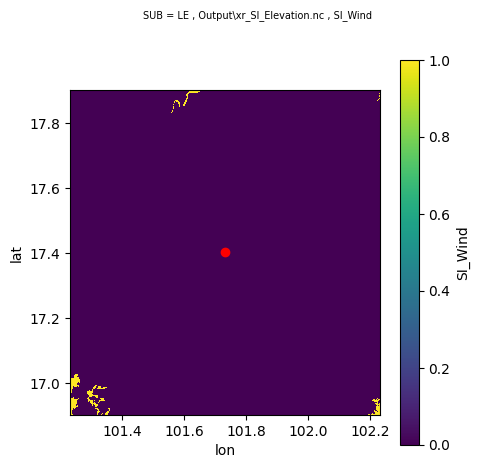

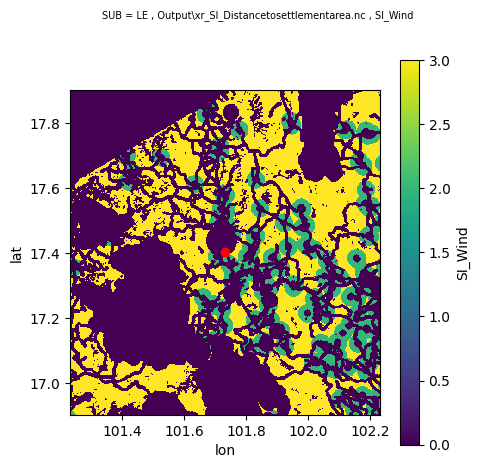

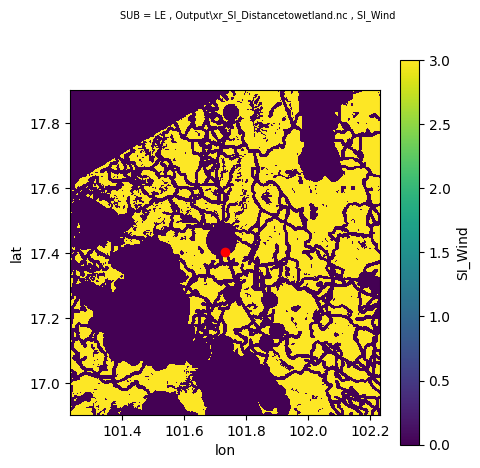

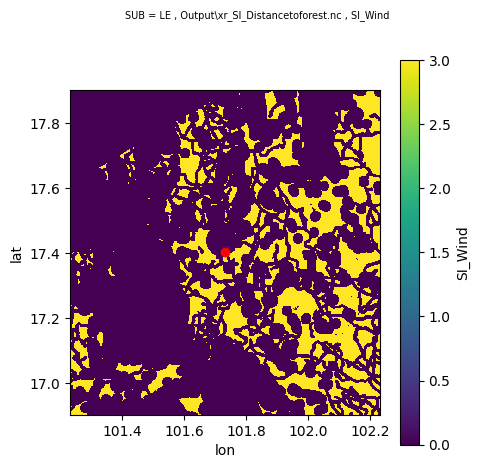

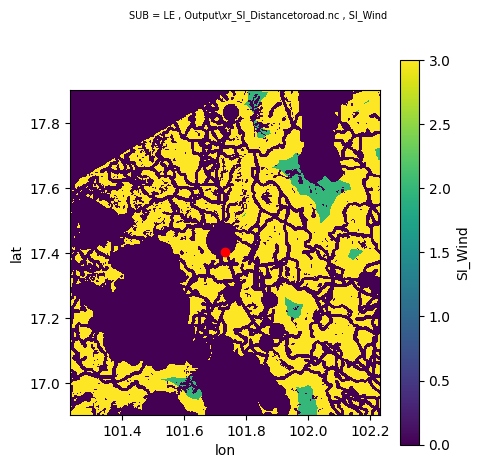

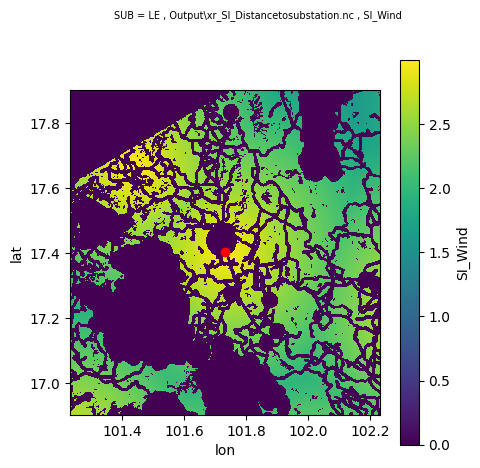

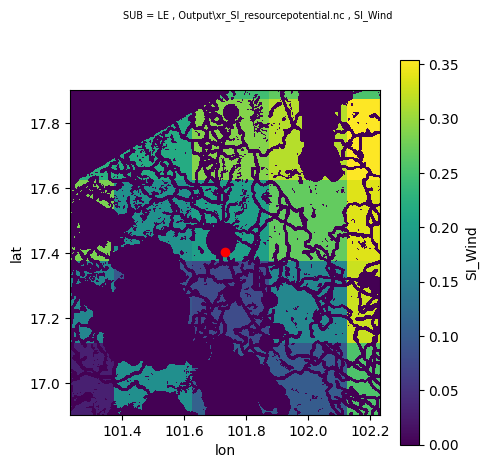

In [5]:
for i in SI_file_list:
    min_lon = subs_wlatlon['buffer'].loc[subs_wlatlon['STATIONID,C,4'] == sub_name].unary_union.bounds[0]
    max_lon = subs_wlatlon['buffer'].loc[subs_wlatlon['STATIONID,C,4'] == sub_name].unary_union.bounds[2]
    max_lat = subs_wlatlon['buffer'].loc[subs_wlatlon['STATIONID,C,4'] == sub_name].unary_union.bounds[1]
    min_lat = subs_wlatlon['buffer'].loc[subs_wlatlon['STATIONID,C,4'] == sub_name].unary_union.bounds[3]
    xr_landuse_suitability_index = xr.open_dataset(i)
    xr_landuse_suitability_index_area = xr_landuse_suitability_index.sel(lat=slice(max_lat,min_lat), lon=slice(min_lon,max_lon))
    xr_landuse_suitability_index.close()

    fig, ax = plt.subplots(figsize=(5,5))
    fig.suptitle('SUB = ' + sub_name +' , '+ i + ' , ' + type, fontsize=7)
    subs_wlatlon.loc[subs_wlatlon['STATIONID,C,4'] == sub_name].plot(ax = ax, color='red', edgecolor = 'red', zorder = 1)
    xr_landuse_suitability_index_area[type].plot(ax = ax,zorder = 0)